# Project: Investigate a Dataset for Egypt indicators- Gapminder.org

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

GapMinder.org database provides us with hundreds of indicators related to all world countries , indecators related to (economics , demographics, education, health care ..etc) , We choose dataset of indicators (population, life expectancy , child mortality , GDP , GDP_per_capita , imports , exports), we will separate these indicators for Egypt only to investigate.

Certain columns like "population" , "GDP_per_capita" and "GDP" contains letters like "M" , "B" and some with "k" indicating million ,Billion and thousands respectivly.
 
#### From these datasets we can answer many different questions like:-
 . Do Population evolve with time?<br> 
 . Do child mortality and life expectancy evolve from year to year?<br>
 . Is there a relation between child mortality and life expectancy with population?<br> 
 . Does GDP evolve from year to year?<br> 
 . Is there a relation between population and GDP?<br> 
 . Is there a relation between population and imports and exports?<br> 
 . Is GDP per capita enhancing over time?<br> 
 . What is the maximum and minimum Trade balance per decades?
 
#### For the analysis included in this notebook I have chosen to address the following questions (some sub-question are addressed within the analysis):
 
 . Q1: Is there a relation between child mortality and life expectancy with population?<br> 
 . Q2: Is there a relation between population and GDP?<br> 
 . Q3: Is GDP per capita (income) enhancing over time?<br>
 . Q4: Is there a relation between population and imports and exports?<br>
 . Q5: What is the maximum and minimum Trade balance per decades?
 
 #### Assumptions:
  . A low child mortality and High life expectancy implies better health care.
 
 #### Disclamir: 
 Egypt is chosen as it is the researcher's country.


In [61]:
# Here we import our libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#extract indicators from CSV files
child_mortality= pd.read_csv("child_mortality_0_5_year_olds_dying_per_1000_born.csv")
life_expectancy= pd.read_csv("life_expectancy_years.csv")
population= pd.read_csv("population_total.csv")
exports= pd.read_csv("exports_percent_of_gdp.csv")
imports= pd.read_csv("imports_percent_of_gdp.csv")
gdp_per_capita= pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
gdp= pd.read_csv("total_gdp_us_inflation_adjusted.csv")


<a id='wrangling'></a>
## Data Wrangling


### General Properties
> We will check columns formats

# Exploring data


In [62]:
population.iloc[50:54,:]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
50,Ecuador,500k,500k,500k,500k,500k,500k,500k,500k,500k,...,24.9M,24.9M,24.9M,24.8M,24.8M,24.7M,24.7M,24.6M,24.5M,24.5M
51,Egypt,3.5M,3.53M,3.56M,3.6M,3.63M,3.66M,3.7M,3.73M,3.76M,...,218M,219M,220M,221M,221M,222M,223M,224M,224M,225M
52,Eritrea,205k,205k,205k,205k,205k,205k,205k,205k,205k,...,8.77M,8.81M,8.85M,8.88M,8.92M,8.95M,8.98M,9.01M,9.04M,9.06M
53,Spain,11.5M,11.5M,11.6M,11.6M,11.6M,11.7M,11.7M,11.7M,11.8M,...,34.3M,34.2M,34M,33.9M,33.8M,33.7M,33.6M,33.5M,33.3M,33.2M


In [63]:
child_mortality.iloc[50:54,:]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
50,Ecuador,406.0,406.0,406.0,406.0,406.0,406.0,406.0,406.0,406.0,...,3.06,3.01,2.96,2.92,2.88,2.83,2.79,2.76,2.72,2.72
51,Egypt,405.0,405.0,405.0,405.0,405.0,405.0,405.0,405.0,405.0,...,5.46,5.42,5.39,5.35,5.31,5.27,5.24,5.20,5.17,5.17
52,Eritrea,441.0,441.0,441.0,441.0,441.0,441.0,441.0,441.0,441.0,...,5.88,5.81,5.74,5.67,5.60,5.53,5.47,5.40,5.34,5.34
53,Spain,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,451.0,...,0.49,0.47,0.46,0.45,0.44,0.43,0.42,0.41,0.40,0.40


In [64]:
life_expectancy.iloc[50:54,:]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
50,Ecuador,32.9,32.9,32.9,32.9,32.9,32.9,32.9,32.9,32.9,...,87.0,87.1,87.2,87.3,87.5,87.6,87.7,87.8,87.9,88.0
51,Egypt,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,...,81.2,81.3,81.4,81.6,81.7,81.8,82.0,82.1,82.2,82.3
52,Eritrea,30.2,30.2,30.2,30.2,30.2,30.2,30.2,30.2,30.2,...,76.8,76.9,77.1,77.2,77.4,77.5,77.7,77.8,77.9,78.1
53,Spain,29.5,29.5,29.5,29.5,29.5,29.5,29.5,29.5,29.5,...,91.3,91.4,91.5,91.7,91.8,91.9,92.0,92.1,92.2,92.3


In [65]:
gdp.iloc[54:58,:]

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
54,Ecuador,11.7B,12.3B,12.9B,13.2B,14.1B,14.6B,14.5B,15.2B,15.5B,...,86.2B,91.1B,95.6B,99.2B,99.3B,98.1B,100B,102B,102B,93.8B
55,Egypt,20.3B,21.3B,22.2B,24.5B,27.3B,28.7B,30.1B,30.4B,29.9B,...,294B,300B,307B,316B,329B,344B,358B,377B,398B,412B
56,Eritrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.25B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Spain,189B,212B,233B,255B,269B,285B,306B,319B,340B,...,1.19TR,1.15TR,1.14TR,1.15TR,1.2TR,1.23TR,1.27TR,1.3TR,1.32TR,1.18TR


In [66]:
gdp_per_capita.iloc[50:53,:]

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
50,Ecuador,599,599,599,599,599,599,599,600,600,...,15.1k,15.4k,15.7k,16.1k,16.4k,16.8k,17.1k,17.5k,17.9k,18.3k
51,Egypt,1120,1120,1120,1120,1120,1120,1120,1120,1120,...,21.5k,21.9k,22.4k,22.9k,23.4k,23.9k,24.4k,24.9k,25.5k,26k
52,Eritrea,602,602,602,602,602,602,602,603,603,...,2380,2440,2490,2540,2600,2650,2710,2770,2830,2890


In [67]:
imports.iloc[53:57,:]

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
53,Ecuador,10.4,10.2,10.8,9.96,10.1,10.3,11.1,12.0,13.9,...,33.4,31.6,31.0,29.7,24.0,19.0,21.6,23.8,23.0,20.8
54,Egypt,21.8,19.7,19.5,23.60,24.9,20.1,20.5,19.1,17.5,...,24.7,24.3,23.4,22.7,21.7,19.9,29.3,29.4,25.7,20.7
55,Eritrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.3,29.4,29.0,30.4,30.6,29.9,31.5,32.4,32.0,29.1


In [68]:
exports.iloc[54:57,:]

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
54,Egypt,19.9,17.6,15.1,17.8,18.4,17.1,16.3,16.8,11.8,...,20.6,16.4,17.0,14.2,13.2,10.3,15.8,18.9,17.5,13.1
55,Eritrea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.5,31.5,33.0,33.5,33.6,33.9,35.1,35.2,35.0,30.6


In [69]:
#Checking for Null values within dataset of intrest

if  exports.iloc[54,:].isnull().values.any() and imports.iloc[54,:].isnull().values.any() \
and gdp.iloc[55,:].isnull().values.any() and gdp_per_capita.iloc[51,:].isnull().values.any() \
and population.iloc[51,:].isnull().values.any() and child_mortality.iloc[51,:].isnull().values.any()\
and life_expectancy.iloc[51,:].isnull().values.any():
    print("Null found")
    
else:
    print("No null values found")

No null values found


> After data exploration economic indicators like (GDP,imports,exports) data before year 1960 is not recorded.
> After data exploration health care indicators like (population, Child mortality, Life expectancy) are projected after 2020

### According to above exploration we will select data related to egypt from year 1960 to 2020 only

 . There is no need for duplication check as it is normal to have duplicates from year to year.  
 . No inacurate/invalid data is present as per above visual check. 
 . No Null value present as per above check.


In [70]:
#In the following step we will choose data related to egypt row only and choose columns related to years 1960 through 2020
egypt_life_expectancy=life_expectancy[life_expectancy["country"]=="Egypt"].iloc[:,161:-80]
egypt_child_mortality=child_mortality[child_mortality["country"]=="Egypt"].iloc[:,161:-80]
egypt_population=population[population["country"]=="Egypt"].iloc[:,161:-80]
egypt_exports=exports[exports["country"]=="Egypt"].iloc[:,:].drop(columns="country")
egypt_imports=imports[imports["country"]=="Egypt"].iloc[:,:].drop(columns="country")
egypt_gdp_per_capita=gdp_per_capita[gdp_per_capita["country"]=="Egypt"].iloc[:,161:-30]
egypt_gdp=gdp[gdp["country"]=="Egypt"].iloc[:,:].drop(columns="country")

#We will create a new dataset called "egypt_data" and append all indicators needed and also rename indexes 
#to reflect the indicator needed to be investigated
egypt_data=egypt_life_expectancy.rename(index={51:"life_expectancy"})
egypt_data=egypt_data.append(egypt_child_mortality).rename(index={51:"child_mortality"})
egypt_data=egypt_data.append(egypt_population).rename(index={51:"population"})
egypt_data=egypt_data.append(egypt_exports).rename(index={54:"exports"})
egypt_data=egypt_data.append(egypt_imports).rename(index={54:"imports"})
egypt_data=egypt_data.append(egypt_gdp_per_capita).rename(index={51:"gdp_per_capita"})
egypt_data=egypt_data.append(egypt_gdp).rename(index={55:"gdp"})

egypt_data.head()


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
life_expectancy,46.9,47.7,47.7,49,49.7,50.7,50.4,50.9,50.9,50.8,...,69.6,69.7,70.1,70.3,69.9,70.2,70.5,70.7,71,71
child_mortality,315,305,295,285,276,268,261,256,251,247,...,27.8,26.6,25.5,24.6,23.6,22.8,21.9,21.2,20.5,19.8
population,26.6M,27.4M,28.1M,28.9M,29.6M,30.4M,31.2M,32.1M,32.9M,33.7M,...,84.5M,86.4M,88.4M,90.4M,92.4M,94.4M,96.4M,98.4M,100M,102M
exports,19.9,17.6,15.1,17.8,18.4,17.1,16.3,16.8,11.8,13.5,...,20.6,16.4,17,14.2,13.2,10.3,15.8,18.9,17.5,13.1
imports,21.8,19.7,19.5,23.6,24.9,20.1,20.5,19.1,17.5,16.5,...,24.7,24.3,23.4,22.7,21.7,19.9,29.3,29.4,25.7,20.7


In [71]:
#Make indicators as columns by using in-built transpose function
egypt_data=egypt_data.transpose()
egypt_data.head()

,life_expectancy,child_mortality,population,exports,imports,gdp_per_capita,gdp
1960,46.9,315,26.6M,19.9,21.8,1840,20.3B
1961,47.7,305,27.4M,17.6,19.7,1930,21.3B
1962,47.7,295,28.1M,15.1,19.5,2030,22.2B
1963,49,285,28.9M,17.8,23.6,2140,24.5B
1964,49.7,276,29.6M,18.4,24.9,2250,27.3B


> We transposed the table so to have economic indicators as our columns

### According to data from gapminder
.Life expectancy is in years<br>
.Child mortality is by count for every 1000 child<br>
.Population in milion<br>
.Exports in percent to GDP<br>
.Imports in percent to GDP<br>
.GDP per capita is by thousands<br>
.GDP in Bilion<br>

In [72]:
egypt_data.describe()

,life_expectancy,child_mortality,population,exports,imports,gdp_per_capita,gdp
count,61.0,61.0,61,61.0,61.0,61,61
unique,54.0,61.0,61,51.0,54.0,58,61
top,47.7,224.0,53.4M,18.2,22.7,10.3k,197B
freq,2.0,1.0,1,2.0,3.0,4,1


> We can't have a statistical data because data formats is not numeric 


### Data Cleaning
> We will assure that our data types are ready for mathimatical operations (convert data types to integers or float instead of strings)

In [73]:
#As descussed in the introduction we will remove letters from columns

# Function for correcting income(GDP_per_capita) by removing k and replace with multiplication of 1000 for the GDP_per_capita column
def change_gdp_per_capita(gdp_per_capita):
    ''' Takes a string and removes
        the "K" letter and return 
        the float value multiplied
        by 1000.
    ''' 
    if "k" in gdp_per_capita:
        return float(gdp_per_capita.split("k")[0])*1000
    else:
        return gdp_per_capita

#Remove "M" letter from population column
egypt_data["population"]=egypt_data["population"].apply(lambda data : data.split("M")[0] )

#Remove "B" letter from gdp column
egypt_data["gdp"]=egypt_data["gdp"].apply(lambda data : data.split("B")[0] )

#Remove "k" letter from gdp_per_capita column and multiply by 1000
egypt_data["gdp_per_capita"]=egypt_data["gdp_per_capita"].apply(change_gdp_per_capita)


egypt_data.head()

,life_expectancy,child_mortality,population,exports,imports,gdp_per_capita,gdp
1960,46.9,315,26.6,19.9,21.8,1840,20.3
1961,47.7,305,27.4,17.6,19.7,1930,21.3
1962,47.7,295,28.1,15.1,19.5,2030,22.2
1963,49,285,28.9,17.8,23.6,2140,24.5
1964,49.7,276,29.6,18.4,24.9,2250,27.3


> Here we removed the milion 'M' letter in population and GDP and also created a function for removing "Thousands" "k" letter and replace it with 1000 so data become ready for changing its format

> we explore data to assure that related changes is applied

In [74]:
#Change datatypes to be float
egypt_data=egypt_data.astype("float")

egypt_data.tail()

,life_expectancy,child_mortality,population,exports,imports,gdp_per_capita,gdp
2016,70.2,22.8,94.4,10.3,19.9,10800.0,344.0
2017,70.5,21.9,96.4,15.8,29.3,11000.0,358.0
2018,70.7,21.2,98.4,18.9,29.4,11400.0,377.0
2019,71.0,20.5,100.0,17.5,25.7,11800.0,398.0
2020,71.0,19.8,102.0,13.1,20.7,12000.0,412.0


> Here we changed the data type to be float

> we explore data to assure that related changes is applied

In [75]:
egypt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 1960 to 2020
Data columns (total 7 columns):
life_expectancy    61 non-null float64
child_mortality    61 non-null float64
population         61 non-null float64
exports            61 non-null float64
imports            61 non-null float64
gdp_per_capita     61 non-null float64
gdp                61 non-null float64
dtypes: float64(7)
memory usage: 6.3+ KB


>Now we are ready for data manipulations

In [76]:
egypt_data.describe()

,life_expectancy,child_mortality,population,exports,imports,gdp_per_capita,gdp
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,61.672131,122.677049,58.259016,19.654098,27.078689,6210.655738,144.726230
std,7.800729,95.751989,22.164313,5.596355,6.825079,3083.428756,113.956205
min,46.900000,19.800000,26.600000,10.300000,16.500000,1840.000000,20.300000
25%,54.400000,36.000000,38.500000,16.200000,22.200000,3030.000000,40.800000
50%,63.900000,85.800000,56.100000,18.200000,25.700000,6050.000000,115.000000
75%,68.800000,215.000000,75.500000,22.500000,31.600000,8400.000000,214.000000
max,71.000000,315.000000,102.000000,33.000000,43.500000,12000.000000,412.000000


>Above is statistical data summary of our indecators

<a id='eda'></a>
## Exploratory Data Analysis


## Research Question 1: The effect of egypt health care on population

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb6f7bedd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcb6f5a9668>]], dtype=object)

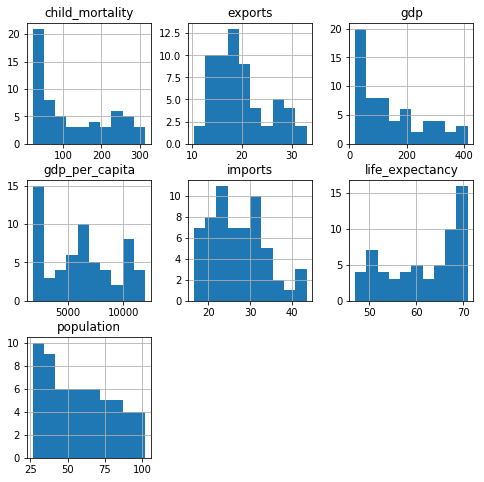

In [77]:
#Viewing overall visualization to get insight about the datasets
egypt_data.hist(figsize=(8,8))

> As a side observation, The histrograms above shows that Child mortality is kept low for many years and life expectancy is kept high for many years.

Text(0,0.5,'Population (millions)')

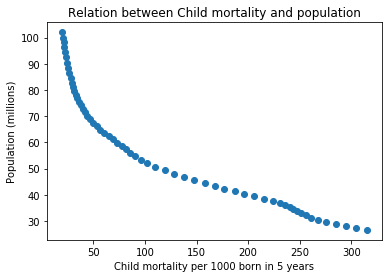

In [78]:
plt.scatter(egypt_data["child_mortality"],egypt_data["population"])
plt.title("Relation between Child mortality and population")
plt.xlabel("Child mortality per 1000 born in 5 years")
plt.ylabel("Population (millions)")

> Child mortality enhancment (decrease) have negative correlation and impact on population (increase).

Text(0,0.5,'Population (millions)')

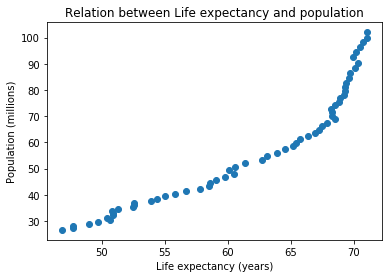

In [79]:
plt.scatter(egypt_data["life_expectancy"],egypt_data["population"])
plt.title("Relation between Life expectancy and population")
plt.xlabel("Life expectancy (years)")
plt.ylabel("Population (millions)")

> Life expectancy enhancment (increase) have positive correlation and impact on population (increase).

#### There is a strong correlation between health care indicators(life expectancy,child_mortality) on total population

<hr></hr>

## Research Question 2: relation between population and GDP

Text(0,0.5,'GDP (Billions)')

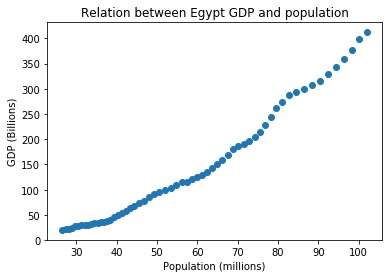

In [80]:
plt.scatter(egypt_data["population"],egypt_data["gdp"])
plt.title("Relation between Egypt GDP and population")
plt.xlabel("Population (millions)")
plt.ylabel("GDP (Billions)")

> As Egyptian population increase there is a positive correlation on economic GDP (increase).

## Research Question 3: relation between population and Income and income evolution

Text(0,0.5,'GDP per capita (Income)')

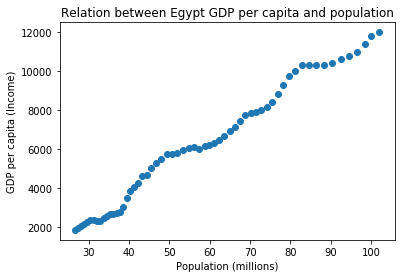

In [81]:
plt.scatter(egypt_data["population"],egypt_data["gdp_per_capita"])
plt.title("Relation between Egypt GDP per capita and population")
plt.xlabel("Population (millions)")
plt.ylabel("GDP per capita (Income)")

>Although Population increases income per capita increases meaning somehow life quality increases with population.

## Question 4: Relation between population and imports and exports

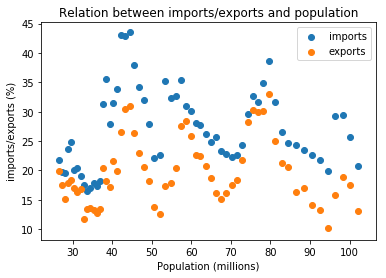

In [82]:
plt.scatter(egypt_data["population"],egypt_data["imports"])
plt.scatter(egypt_data["population"],egypt_data["exports"])

plt.title("Relation between imports/exports and population")
plt.xlabel("Population (millions)")
plt.ylabel("imports/exports (%)")
plt.legend()

> Imports in blue , Exports in orange

> Imports is usualy higher than exports with all population variation

> there is no correlation between population and imports/exports percentages

### Now we will insert a new column for decads for exporing imports and exports through 10 years periods(decades)

In [83]:
#Insert new column as decades
egypt_data["decades"]=egypt_data.index
#Remove last number from years like 1984 to be 198 ..etc
egypt_data["decades"]=egypt_data["decades"].apply(lambda x:x[0:3])

#Drop last decade 2020 as there is only one year not ten
egypt_data.drop(["2020"], axis=0, inplace=True)

egypt_data.tail(15)

,life_expectancy,child_mortality,population,exports,imports,gdp_per_capita,gdp,decades
2005,68.8,36.0,75.5,30.3,32.6,8400.0,214.0,200
2006,68.9,34.4,76.9,29.9,31.6,8810.0,228.0,200
2007,69.2,33.0,78.2,30.2,34.8,9280.0,245.0,200
2008,69.3,31.6,79.6,33.0,38.6,9760.0,262.0,200
2009,69.3,30.2,81.1,25.0,31.6,10000.0,274.0,200
2010,69.4,29.0,82.8,21.3,26.6,10300.0,288.0,201
2011,69.6,27.8,84.5,20.6,24.7,10300.0,294.0,201
2012,69.7,26.6,86.4,16.4,24.3,10300.0,300.0,201
2013,70.1,25.5,88.4,17.0,23.4,10300.0,307.0,201
2014,70.3,24.6,90.4,14.2,22.7,10400.0,316.0,201


>sixties will be 196 , seventies will be 197 ...etc

> milinia will be 200 , first decade after milinia will be 201 ...etc

> We droped 2020 as it is one year only not a decade

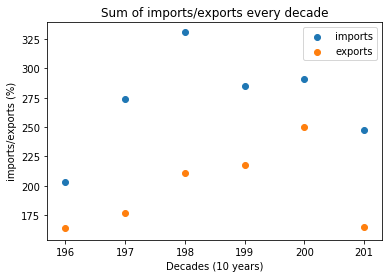

In [84]:
#Get the sum of all imports for every decade by using in-build function group by
imports_sum_per_decade=egypt_data.groupby("decades")["imports"].sum()
#Get the sum of all Exports for every decade by using in-build function group by
exports_sum_per_decade=egypt_data.groupby("decades")["exports"].sum()


plt.scatter(imports_sum_per_decade.index,imports_sum_per_decade)
plt.scatter(imports_sum_per_decade.index,exports_sum_per_decade)
plt.title("Sum of imports/exports every decade")
plt.xlabel("Decades (10 years)")
plt.ylabel("imports/exports (%)")
plt.legend()

> highest exports was in the milinia and lowest was in 1st decade after milinia

> highest imports was in the eighties and lowest was in sexties decade after milinia


## Question 5: maximum and minimum Trade balance per decade

## Trade balance indecators

>Trade balance indicator is the differance between country imports and exports, which gives insight on country's international commercial status

Text(0,0.5,'Trade balance (%)')

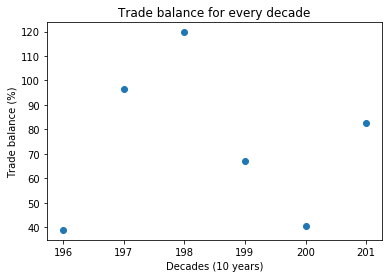

In [85]:
trade_balance=imports_sum_per_decade-exports_sum_per_decade

plt.scatter(trade_balance.index,trade_balance)
plt.title("Trade balance for every decade")
plt.xlabel("Decades (10 years)")
plt.ylabel("Trade balance (%)")

> The eighties are the worst in trade balance, and the milinia and sexties are the best

In [86]:
trade_balance.describe()

count      6.000000
mean      74.216667
std       31.855073
min       38.900000
25%       47.175000
50%       74.700000
75%       93.150000
max      119.700000
dtype: float64

##### Trade balance best is 38.9 Bilion and worst is 119.7 Bilion
##### Trade balance average is 74.2 Bilion

<a id='conclusions'></a>
## Conclusions

In relation to our questions:-  
. Q1: Is there a relation between child mortality and life expectancy with population?  
&#160;&#160;&#160;&#160;  A1: yes, positive.  
. Q2: Is there a relation between population and GDP?  
&#160;&#160;&#160;&#160;      A2: yes, positive.  
. Q3: Is GDP per capita (income) enhancing over time?  
&#160;&#160;&#160;&#160;      A3: yes, positive.
. Q4: Is there a relation between population and imports and exports?  
&#160;&#160;&#160;&#160;      A4: No, no correlation.  
. Q5: What is the maximum and minimum Trade balance per decades?  
&#160;&#160;&#160;&#160;      A5: 119 Bilion and 38 Bilion.  

> Finally, as per our analysis Egypt economic indicators have a high correlation with its population but imports and exports have no correlation as expected, various other indicators can be taken into consderation for future analysis like education level , literacy ration ..etc.

> There was a limitation to extend our analysis for more years due to limited data specially the old one.Because data related to population is available for old years (before 1960) but economic indicators are limited only from year 1960.

> Regarding Trade balance statistics the 2000's was the best in relation to quantity and performance.

> Additional research can be benificial if new indecators is added like (education level , literacy) and GDP per capita can be a good cadidate

> All correlation mentioned above are strong which indicates causation but not the single cause as economic/population indicators are affected by other countless indicators.


In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0